In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: BBL
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


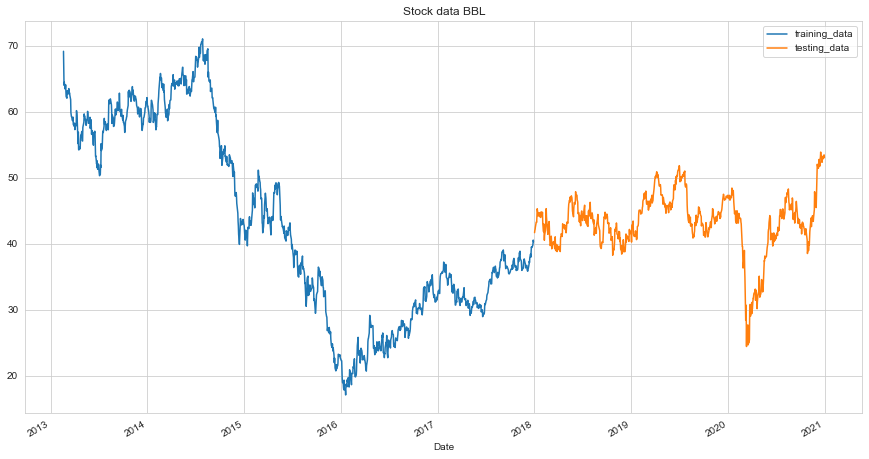

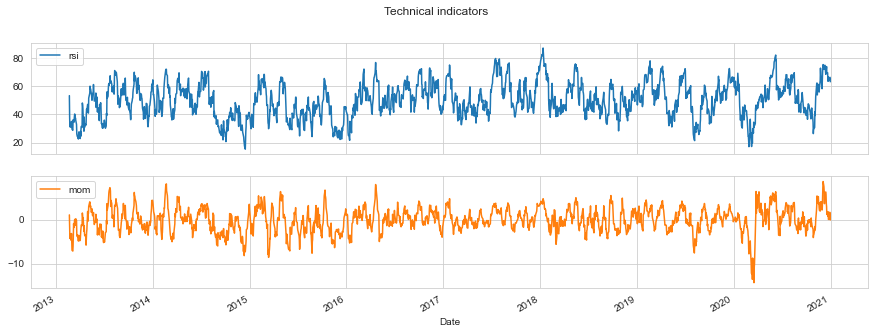

In [2]:
stock_name = 'bbl'.upper()
industry = 'Basic Materials'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 995.15, duration: 0:00:00.182033
episode: 2/2000, episode end value: 1023.60, duration: 0:00:00.185041
episode: 3/2000, episode end value: 1021.03, duration: 0:00:00.214032
episode: 4/2000, episode end value: 956.92, duration: 0:00:00.180056
episode: 5/2000, episode end value: 983.77, duration: 0:00:00.182042
episode: 6/2000, episode end value: 1007.18, duration: 0:00:00.227051
episode: 7/2000, episode end value: 1053.83, duration: 0:00:00.165036
episode: 8/2000, episode end value: 980.38, duration: 0:00:00.190055
episode: 9/2000, episode end value: 996.52, duration: 0:00:00.186048
episode: 10/2000, episode end value: 1012.41, duration: 0:00:00.194051
episode: 11/2000, episode end value: 1030.90, duration: 0:00:00.184028
episode: 12/2000, episode end value: 989.56, duration: 0:00:00.200064
episode: 13/2000, episode end value: 966.03, duration: 0:00:00.196060
episode: 14/2000, episode end value: 931.95, duration: 0:00:00.202045
episode: 15/2000, episo

episode: 118/2000, episode end value: 957.86, duration: 0:00:00.202042
episode: 119/2000, episode end value: 957.45, duration: 0:00:00.205046
episode: 120/2000, episode end value: 940.39, duration: 0:00:00.210045
episode: 121/2000, episode end value: 947.92, duration: 0:00:00.216054
episode: 122/2000, episode end value: 951.54, duration: 0:00:00.209063
episode: 123/2000, episode end value: 972.40, duration: 0:00:00.207039
episode: 124/2000, episode end value: 1160.79, duration: 0:00:00.192027
episode: 125/2000, episode end value: 986.19, duration: 0:00:00.227059
episode: 126/2000, episode end value: 948.49, duration: 0:00:00.218042
episode: 127/2000, episode end value: 963.05, duration: 0:00:00.200046
episode: 128/2000, episode end value: 941.10, duration: 0:00:00.202038
episode: 129/2000, episode end value: 968.56, duration: 0:00:00.209060
episode: 130/2000, episode end value: 946.39, duration: 0:00:00.215042
episode: 131/2000, episode end value: 985.81, duration: 0:00:00.217051
episo

episode: 234/2000, episode end value: 950.38, duration: 0:00:00.250050
episode: 235/2000, episode end value: 940.68, duration: 0:00:00.263059
episode: 236/2000, episode end value: 943.36, duration: 0:00:00.255059
episode: 237/2000, episode end value: 949.42, duration: 0:00:00.239053
episode: 238/2000, episode end value: 968.44, duration: 0:00:00.261078
episode: 239/2000, episode end value: 973.10, duration: 0:00:00.247054
episode: 240/2000, episode end value: 1010.50, duration: 0:00:00.254059
episode: 241/2000, episode end value: 1034.29, duration: 0:00:00.257053
episode: 242/2000, episode end value: 944.05, duration: 0:00:00.245055
episode: 243/2000, episode end value: 977.71, duration: 0:00:00.294064
episode: 244/2000, episode end value: 969.52, duration: 0:00:00.279074
episode: 245/2000, episode end value: 932.73, duration: 0:00:00.255065
episode: 246/2000, episode end value: 991.85, duration: 0:00:00.259042
episode: 247/2000, episode end value: 1038.97, duration: 0:00:00.255055
epi

episode: 350/2000, episode end value: 943.92, duration: 0:00:00.402090
episode: 351/2000, episode end value: 989.40, duration: 0:00:00.413091
episode: 352/2000, episode end value: 995.73, duration: 0:00:00.430096
episode: 353/2000, episode end value: 961.83, duration: 0:00:00.428098
episode: 354/2000, episode end value: 977.33, duration: 0:00:00.402092
episode: 355/2000, episode end value: 1028.17, duration: 0:00:00.424095
episode: 356/2000, episode end value: 945.54, duration: 0:00:00.451101
episode: 357/2000, episode end value: 976.47, duration: 0:00:00.413094
episode: 358/2000, episode end value: 977.99, duration: 0:00:00.370083
episode: 359/2000, episode end value: 994.70, duration: 0:00:00.334080
episode: 360/2000, episode end value: 947.77, duration: 0:00:00.339071
episode: 361/2000, episode end value: 1033.15, duration: 0:00:00.339080
episode: 362/2000, episode end value: 947.77, duration: 0:00:00.368913
episode: 363/2000, episode end value: 954.09, duration: 0:00:00.383142
epis

episode: 465/2000, episode end value: 987.20, duration: 0:00:00.414493
episode: 466/2000, episode end value: 979.37, duration: 0:00:00.462110
episode: 467/2000, episode end value: 990.40, duration: 0:00:00.415101
episode: 468/2000, episode end value: 991.38, duration: 0:00:00.412092
episode: 469/2000, episode end value: 964.18, duration: 0:00:00.454105
episode: 470/2000, episode end value: 998.70, duration: 0:00:00.399089
episode: 471/2000, episode end value: 1031.25, duration: 0:00:00.387084
episode: 472/2000, episode end value: 978.75, duration: 0:00:00.411092
episode: 473/2000, episode end value: 1019.01, duration: 0:00:00.415091
episode: 474/2000, episode end value: 1016.06, duration: 0:00:00.424096
episode: 475/2000, episode end value: 989.50, duration: 0:00:00.382087
episode: 476/2000, episode end value: 979.66, duration: 0:00:00.340080
episode: 477/2000, episode end value: 996.17, duration: 0:00:00.429092
episode: 478/2000, episode end value: 990.19, duration: 0:00:00.423095
epi

episode: 580/2000, episode end value: 966.83, duration: 0:00:00.443099
episode: 581/2000, episode end value: 1045.73, duration: 0:00:00.374084
episode: 582/2000, episode end value: 969.50, duration: 0:00:00.415094
episode: 583/2000, episode end value: 990.80, duration: 0:00:00.424100
episode: 584/2000, episode end value: 965.86, duration: 0:00:00.482103
episode: 585/2000, episode end value: 943.85, duration: 0:00:00.394089
episode: 586/2000, episode end value: 1017.50, duration: 0:00:00.362085
episode: 587/2000, episode end value: 983.49, duration: 0:00:00.381086
episode: 588/2000, episode end value: 985.01, duration: 0:00:00.395084
episode: 589/2000, episode end value: 1254.79, duration: 0:00:00.371085
episode: 590/2000, episode end value: 1016.73, duration: 0:00:00.463100
episode: 591/2000, episode end value: 1003.04, duration: 0:00:00.442099
episode: 592/2000, episode end value: 1053.53, duration: 0:00:00.470110
episode: 593/2000, episode end value: 1004.73, duration: 0:00:00.388085

episode: 695/2000, episode end value: 977.61, duration: 0:00:00.425096
episode: 696/2000, episode end value: 1020.60, duration: 0:00:00.423100
episode: 697/2000, episode end value: 1002.97, duration: 0:00:00.411087
episode: 698/2000, episode end value: 990.31, duration: 0:00:00.431099
episode: 699/2000, episode end value: 988.07, duration: 0:00:00.457097
episode: 700/2000, episode end value: 985.95, duration: 0:00:00.418096
episode: 701/2000, episode end value: 1003.83, duration: 0:00:00.370083
episode: 702/2000, episode end value: 958.95, duration: 0:00:00.419101
episode: 703/2000, episode end value: 990.92, duration: 0:00:00.366082
episode: 704/2000, episode end value: 982.05, duration: 0:00:00.444099
episode: 705/2000, episode end value: 994.71, duration: 0:00:00.369082
episode: 706/2000, episode end value: 959.48, duration: 0:00:00.393087
episode: 707/2000, episode end value: 999.08, duration: 0:00:00.388087
episode: 708/2000, episode end value: 994.55, duration: 0:00:00.392092
epi

episode: 810/2000, episode end value: 974.83, duration: 0:00:00.419093
episode: 811/2000, episode end value: 984.28, duration: 0:00:00.382086
episode: 812/2000, episode end value: 987.36, duration: 0:00:00.459104
episode: 813/2000, episode end value: 970.78, duration: 0:00:00.389088
episode: 814/2000, episode end value: 961.04, duration: 0:00:00.416093
episode: 815/2000, episode end value: 1010.11, duration: 0:00:00.387089
episode: 816/2000, episode end value: 1013.19, duration: 0:00:00.379089
episode: 817/2000, episode end value: 1015.36, duration: 0:00:00.409092
episode: 818/2000, episode end value: 958.69, duration: 0:00:00.466106
episode: 819/2000, episode end value: 973.07, duration: 0:00:00.424676
episode: 820/2000, episode end value: 1023.27, duration: 0:00:00.416161
episode: 821/2000, episode end value: 965.54, duration: 0:00:00.424029
episode: 822/2000, episode end value: 966.78, duration: 0:00:00.427799
episode: 823/2000, episode end value: 989.80, duration: 0:00:00.349945
ep

episode: 925/2000, episode end value: 993.17, duration: 0:00:00.383092
episode: 926/2000, episode end value: 1012.70, duration: 0:00:00.416085
episode: 927/2000, episode end value: 1052.85, duration: 0:00:00.382089
episode: 928/2000, episode end value: 965.98, duration: 0:00:00.431836
episode: 929/2000, episode end value: 1009.22, duration: 0:00:00.420052
episode: 930/2000, episode end value: 1011.33, duration: 0:00:00.422094
episode: 931/2000, episode end value: 971.05, duration: 0:00:00.415094
episode: 932/2000, episode end value: 990.92, duration: 0:00:00.362244
episode: 933/2000, episode end value: 974.08, duration: 0:00:00.418632
episode: 934/2000, episode end value: 978.68, duration: 0:00:00.437953
episode: 935/2000, episode end value: 953.42, duration: 0:00:00.400094
episode: 936/2000, episode end value: 1051.96, duration: 0:00:00.402087
episode: 937/2000, episode end value: 1013.63, duration: 0:00:00.400094
episode: 938/2000, episode end value: 997.76, duration: 0:00:00.381084


episode: 1040/2000, episode end value: 1026.58, duration: 0:00:00.469104
episode: 1041/2000, episode end value: 1020.97, duration: 0:00:00.500114
episode: 1042/2000, episode end value: 971.98, duration: 0:00:00.470107
episode: 1043/2000, episode end value: 1030.02, duration: 0:00:00.418096
episode: 1044/2000, episode end value: 1365.07, duration: 0:00:00.414094
episode: 1045/2000, episode end value: 1021.56, duration: 0:00:00.490107
episode: 1046/2000, episode end value: 1000.74, duration: 0:00:00.460101
episode: 1047/2000, episode end value: 1005.56, duration: 0:00:00.475108
episode: 1048/2000, episode end value: 975.01, duration: 0:00:00.427103
episode: 1049/2000, episode end value: 1001.58, duration: 0:00:00.451098
episode: 1050/2000, episode end value: 972.70, duration: 0:00:00.392677
episode: 1051/2000, episode end value: 1046.01, duration: 0:00:00.455104
episode: 1052/2000, episode end value: 992.36, duration: 0:00:00.439099
episode: 1053/2000, episode end value: 997.14, duration

episode: 1154/2000, episode end value: 1021.03, duration: 0:00:00.457099
episode: 1155/2000, episode end value: 954.15, duration: 0:00:00.434098
episode: 1156/2000, episode end value: 1062.00, duration: 0:00:00.363083
episode: 1157/2000, episode end value: 980.71, duration: 0:00:00.442097
episode: 1158/2000, episode end value: 973.52, duration: 0:00:00.393087
episode: 1159/2000, episode end value: 976.97, duration: 0:00:00.427095
episode: 1160/2000, episode end value: 980.58, duration: 0:00:00.396087
episode: 1161/2000, episode end value: 1031.08, duration: 0:00:00.352080
episode: 1162/2000, episode end value: 1014.51, duration: 0:00:00.358078
episode: 1163/2000, episode end value: 992.01, duration: 0:00:00.435098
episode: 1164/2000, episode end value: 1015.17, duration: 0:00:00.378084
episode: 1165/2000, episode end value: 1015.12, duration: 0:00:00.427096
episode: 1166/2000, episode end value: 969.47, duration: 0:00:00.440674
episode: 1167/2000, episode end value: 952.08, duration: 0

episode: 1268/2000, episode end value: 974.37, duration: 0:00:00.404088
episode: 1269/2000, episode end value: 1011.38, duration: 0:00:00.419097
episode: 1270/2000, episode end value: 975.05, duration: 0:00:00.404091
episode: 1271/2000, episode end value: 995.36, duration: 0:00:00.363080
episode: 1272/2000, episode end value: 990.87, duration: 0:00:00.444100
episode: 1273/2000, episode end value: 1041.21, duration: 0:00:00.367083
episode: 1274/2000, episode end value: 1005.74, duration: 0:00:00.395086
episode: 1275/2000, episode end value: 964.93, duration: 0:00:00.469692
episode: 1276/2000, episode end value: 1101.96, duration: 0:00:00.376551
episode: 1277/2000, episode end value: 981.51, duration: 0:00:00.423044
episode: 1278/2000, episode end value: 981.51, duration: 0:00:00.445119
episode: 1279/2000, episode end value: 981.20, duration: 0:00:00.439094
episode: 1280/2000, episode end value: 1012.54, duration: 0:00:00.420100
episode: 1281/2000, episode end value: 972.32, duration: 0:

episode: 1382/2000, episode end value: 1097.83, duration: 0:00:00.397390
episode: 1383/2000, episode end value: 1028.77, duration: 0:00:00.467377
episode: 1384/2000, episode end value: 957.83, duration: 0:00:00.415095
episode: 1385/2000, episode end value: 1014.06, duration: 0:00:00.397091
episode: 1386/2000, episode end value: 1016.31, duration: 0:00:00.424092
episode: 1387/2000, episode end value: 965.41, duration: 0:00:00.387088
episode: 1388/2000, episode end value: 980.77, duration: 0:00:00.442094
episode: 1389/2000, episode end value: 968.36, duration: 0:00:00.397090
episode: 1390/2000, episode end value: 1009.67, duration: 0:00:00.374083
episode: 1391/2000, episode end value: 1003.27, duration: 0:00:00.390085
episode: 1392/2000, episode end value: 1016.52, duration: 0:00:00.382125
episode: 1393/2000, episode end value: 1009.15, duration: 0:00:00.418128
episode: 1394/2000, episode end value: 998.77, duration: 0:00:00.378082
episode: 1395/2000, episode end value: 959.67, duration:

episode: 1496/2000, episode end value: 1010.91, duration: 0:00:00.451102
episode: 1497/2000, episode end value: 1028.47, duration: 0:00:00.470109
episode: 1498/2000, episode end value: 992.63, duration: 0:00:00.469103
episode: 1499/2000, episode end value: 1011.84, duration: 0:00:00.346081
episode: 1500/2000, episode end value: 976.37, duration: 0:00:00.367087
episode: 1501/2000, episode end value: 1040.54, duration: 0:00:00.416089
episode: 1502/2000, episode end value: 1055.49, duration: 0:00:00.378084
episode: 1503/2000, episode end value: 1042.29, duration: 0:00:00.406645
episode: 1504/2000, episode end value: 1012.63, duration: 0:00:00.442983
episode: 1505/2000, episode end value: 1010.33, duration: 0:00:00.409405
episode: 1506/2000, episode end value: 1023.94, duration: 0:00:00.422095
episode: 1507/2000, episode end value: 1017.93, duration: 0:00:00.361081
episode: 1508/2000, episode end value: 985.23, duration: 0:00:00.429100
episode: 1509/2000, episode end value: 946.81, duratio

episode: 1610/2000, episode end value: 1027.39, duration: 0:00:00.375083
episode: 1611/2000, episode end value: 1007.01, duration: 0:00:00.425097
episode: 1612/2000, episode end value: 979.54, duration: 0:00:00.445098
episode: 1613/2000, episode end value: 982.33, duration: 0:00:00.364082
episode: 1614/2000, episode end value: 994.90, duration: 0:00:00.361081
episode: 1615/2000, episode end value: 1027.84, duration: 0:00:00.388598
episode: 1616/2000, episode end value: 1008.22, duration: 0:00:00.410100
episode: 1617/2000, episode end value: 1003.66, duration: 0:00:00.332339
episode: 1618/2000, episode end value: 984.94, duration: 0:00:00.401093
episode: 1619/2000, episode end value: 949.49, duration: 0:00:00.408092
episode: 1620/2000, episode end value: 1008.06, duration: 0:00:00.387087
episode: 1621/2000, episode end value: 1000.06, duration: 0:00:00.427093
episode: 1622/2000, episode end value: 969.44, duration: 0:00:00.382088
episode: 1623/2000, episode end value: 971.97, duration: 

episode: 1724/2000, episode end value: 1007.95, duration: 0:00:00.431098
episode: 1725/2000, episode end value: 982.28, duration: 0:00:00.365086
episode: 1726/2000, episode end value: 999.60, duration: 0:00:00.372073
episode: 1727/2000, episode end value: 1010.16, duration: 0:00:00.387087
episode: 1728/2000, episode end value: 981.38, duration: 0:00:00.356085
episode: 1729/2000, episode end value: 1098.89, duration: 0:00:00.345077
episode: 1730/2000, episode end value: 1103.36, duration: 0:00:00.361079
episode: 1731/2000, episode end value: 981.20, duration: 0:00:00.432095
episode: 1732/2000, episode end value: 1054.75, duration: 0:00:00.384089
episode: 1733/2000, episode end value: 995.35, duration: 0:00:00.405092
episode: 1734/2000, episode end value: 987.92, duration: 0:00:00.366081
episode: 1735/2000, episode end value: 976.81, duration: 0:00:00.452101
episode: 1736/2000, episode end value: 970.30, duration: 0:00:00.414095
episode: 1737/2000, episode end value: 1003.44, duration: 0

episode: 1838/2000, episode end value: 972.04, duration: 0:00:00.467104
episode: 1839/2000, episode end value: 1033.75, duration: 0:00:00.433098
episode: 1840/2000, episode end value: 985.12, duration: 0:00:00.421092
episode: 1841/2000, episode end value: 1008.29, duration: 0:00:00.366084
episode: 1842/2000, episode end value: 1035.89, duration: 0:00:00.407091
episode: 1843/2000, episode end value: 971.47, duration: 0:00:00.403091
episode: 1844/2000, episode end value: 952.45, duration: 0:00:00.412097
episode: 1845/2000, episode end value: 991.30, duration: 0:00:00.414093
episode: 1846/2000, episode end value: 1036.57, duration: 0:00:00.486107
episode: 1847/2000, episode end value: 1005.09, duration: 0:00:00.396088
episode: 1848/2000, episode end value: 1017.26, duration: 0:00:00.398089
episode: 1849/2000, episode end value: 967.76, duration: 0:00:00.394090
episode: 1850/2000, episode end value: 1139.77, duration: 0:00:00.325073
episode: 1851/2000, episode end value: 966.71, duration: 

episode: 1952/2000, episode end value: 984.66, duration: 0:00:00.358080
episode: 1953/2000, episode end value: 985.82, duration: 0:00:00.343078
episode: 1954/2000, episode end value: 977.99, duration: 0:00:00.340075
episode: 1955/2000, episode end value: 1022.77, duration: 0:00:00.441104
episode: 1956/2000, episode end value: 979.05, duration: 0:00:00.401087
episode: 1957/2000, episode end value: 961.56, duration: 0:00:00.353083
episode: 1958/2000, episode end value: 969.41, duration: 0:00:00.354075
episode: 1959/2000, episode end value: 1014.01, duration: 0:00:00.386090
episode: 1960/2000, episode end value: 1009.75, duration: 0:00:00.289071
episode: 1961/2000, episode end value: 953.26, duration: 0:00:00.455103
episode: 1962/2000, episode end value: 984.12, duration: 0:00:00.420094
episode: 1963/2000, episode end value: 978.96, duration: 0:00:00.440101
episode: 1964/2000, episode end value: 986.06, duration: 0:00:00.486107
episode: 1965/2000, episode end value: 1021.18, duration: 0:0

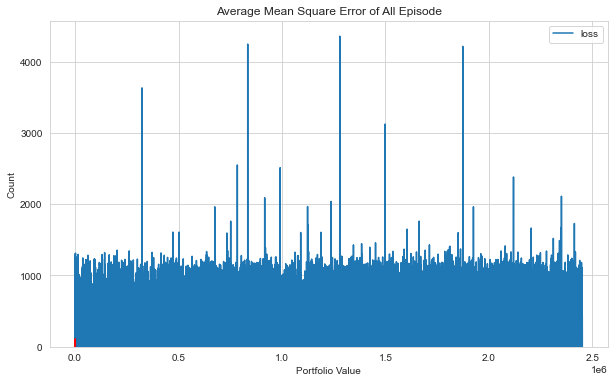

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

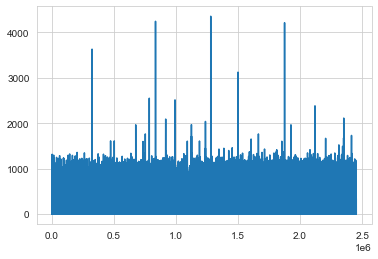

In [5]:
plt.plot(agent.model.losses)

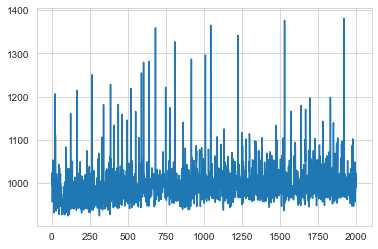

In [6]:
plt.plot(portfolio_value)

episode end value: 1094.20, duration: 0:00:00.082016
Sell: 23 times, Buy: 17 times


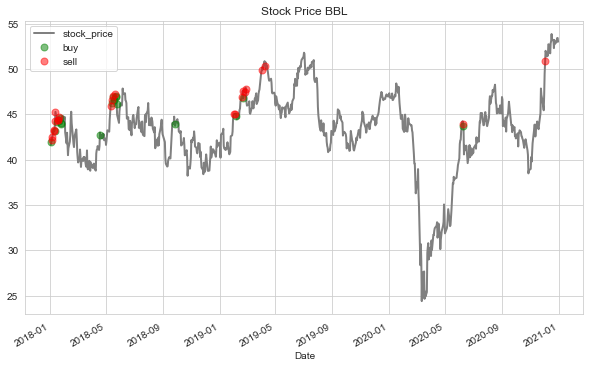

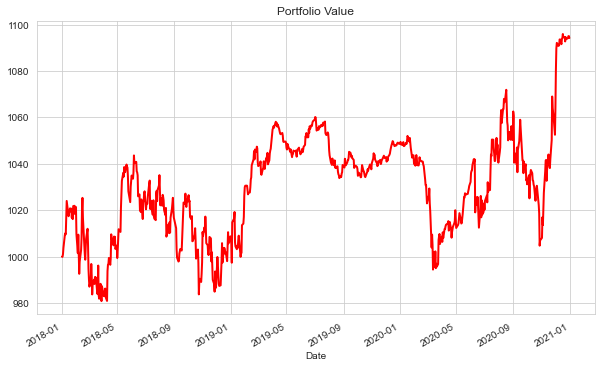

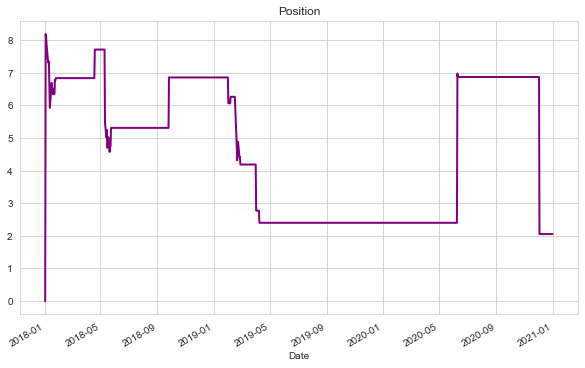

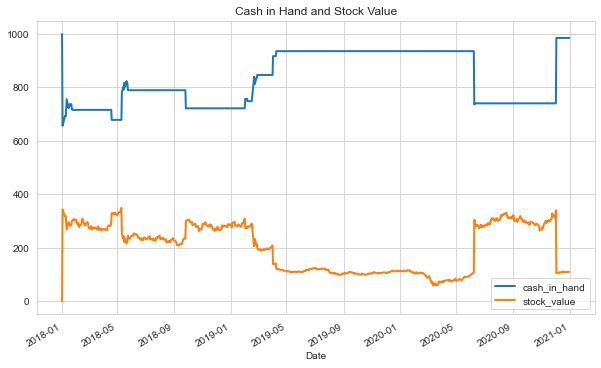

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: BBL
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 3.05 %
Volatility: 0.0689
shape ratio: 0.2823
Maximun drawdown: -6.26 %
Calmar ratio: 0.4864
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 8.38 %
Volatility (benchmark): 0.3813
shape ratio: 0.1908
Maximun drawdown: -52.89 %
Calmar ratio (benchmark): 0.1584


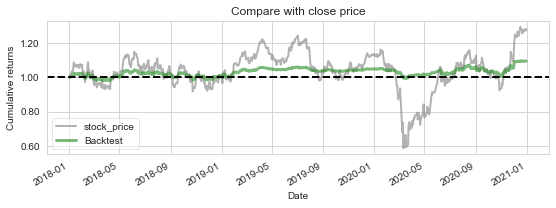

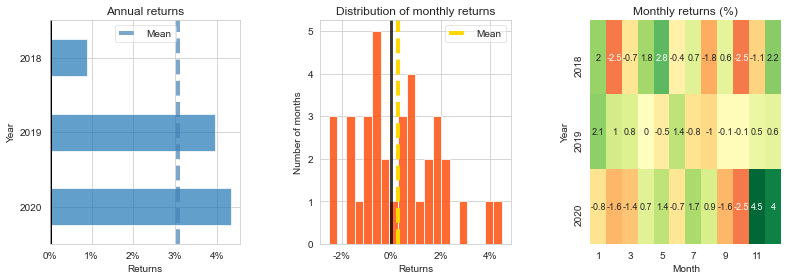

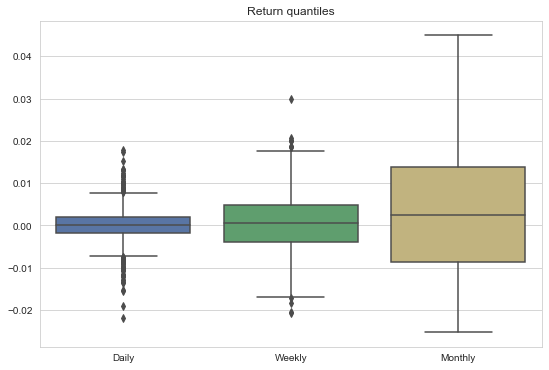

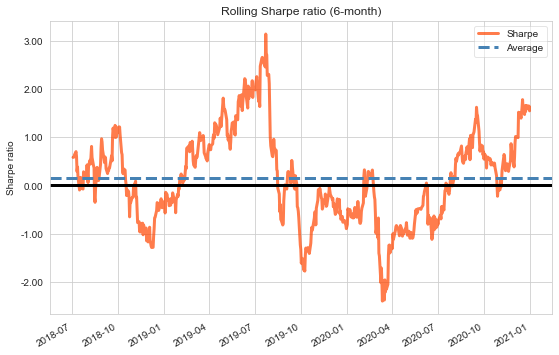

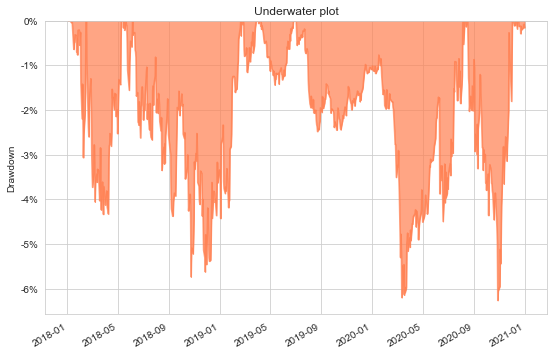

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')